In [1]:
# CP421 Group Project (Group 3)
# -----------------------------------------------------------------
# File: cp421_group_project.ipynb
# Author: Yvonne Itangishaka, Mariam Lom, Hoi Hin Ng, Melissa Pinto
# Due Date: Dec 6th, 2023
# -----------------------------------------------------------------

# Import Python libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-t

True

# Load Data

In [3]:
books_data = pd.read_csv('Books.csv', dtype={'Year-Of-Publication': str})
ratings_data = pd.read_csv('Ratings.csv')
users_data = pd.read_csv('Users.csv')

# Concatenate relevant columns into 'Books-Data' column
books_data["Books-Data"] = (
    books_data["ISBN"].astype(str) +
    books_data["Book-Title"]+
    books_data["Book-Author"] +
    books_data["Year-Of-Publication"].astype(str) +
    books_data["Publisher"] +
    books_data["Image-URL-S"] +
    books_data["Image-URL-M"] +
    books_data["Image-URL-L"]
)

print("Books Data:")
display(books_data.head())
print("\nRatings Data:")
display(ratings_data.head())
print("\nUsers Data:")
display(users_data.head())


Books Data:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Books-Data
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0195153448Classical MythologyMark P. O. Morfor...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0002005018Clara CallanRichard Bruce Wright2001...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0060973129Decision in NormandyCarlo D'Este1991...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0374157065Flu: The Story of the Great Influenz...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0393045218The Mummies of UrumchiE. J. W. Barbe...



Ratings Data:


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6



Users Data:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Data Preprocessing


In [4]:
books_data = books_data.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L']) #drop because it is not needed
#Check for missing values
missing_books = books_data.isnull().sum()
print("missing values in books:\n",missing_books)
print("\n")
missing_ratings = ratings_data.isnull().sum()
print("missing values in ratings:\n",missing_ratings)
print("\n")
missing_users = users_data.isnull().sum()
print("missing values in users:\n",missing_users)
print("\n")

#Check for duplicates in data set
print("duplicates in books:\n",books_data.duplicated().sum())
print("\n")
ratings_books = ratings_data.duplicated().sum()
print("duplicates in ratings:\n",ratings_books)
print("\n")
duplicate_users = users_data.duplicated().sum()
print("duplicates in users:\n",duplicate_users)


missing values in books:
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Books-Data             6
dtype: int64


missing values in ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


missing values in users:
 User-ID          0
Location         0
Age         110762
dtype: int64


duplicates in books:
 0


duplicates in ratings:
 0


duplicates in users:
 0


Note:


*   We have missing values in books and users datasets, but no duplicates in any of the data sets
*   'Age' has a lot of missing values: 110762

*   'Book-Author' has 1 missing value, 'Publisher' has 2 missing values,'Books-Data' has 6 missing values.





In [5]:
books_data.dropna(inplace=True)

#drop age since it is not needed
users_data.drop('Age',axis=1,inplace=True)

# Exploratory Data Analysis (EDA)

In [6]:
print(books_data.columns)
print(ratings_data.columns)
print(users_data.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Books-Data'],
      dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['User-ID', 'Location'], dtype='object')


Lets understand the variables in our dataset:

**Books**

*   Book - Title: The title of the book
*   Book-Author: The author(s) of the book

*   Year-Of-Publication:The year in which the book was published
*   Publisher: The publishing company or entity responsible for producing and distributing the book


*  Books-Data: Additional data related to books that may include various attributes or details

**Ratings**
*   User-ID: A unique identifier for each user in the system


*   ISBN: International Standard Book Number, a unique identifier for books
*   Book-Rating: The rating given by a user to a specific book, indicating the user's opinion or preference

**Users**


*   User-ID: A unique identifier for each user in the system   
*   Location: The geographic location or address of the user


*   Age: The age of the user











In [7]:
#Get descriptive stats
books_stats = books_data.describe()
print("Books stats: \n",books_stats)
ratings_stats = ratings_data.describe()
print("Rating stats: \n",ratings_stats)
users_stats = users_data.describe()
print("Users stats: \n",users_stats)

Books stats: 
               ISBN      Book-Title      Book-Author Year-Of-Publication  \
count       271354          271354           271354              271354   
unique      271354          242130           102020                 116   
top     0195153448  Selected Poems  Agatha Christie                2002   
freq             1              27              632               17626   

        Publisher                                         Books-Data  
count      271354                                             271354  
unique      16803                                             271354  
top     Harlequin  0195153448Classical MythologyMark P. O. Morfor...  
freq         7535                                                  1  
Rating stats: 
             User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00


In [8]:
#Merge tables
first_merged_data = pd.merge(books_data, ratings_data, on='ISBN', how='inner')
merged_data = pd.merge(first_merged_data, users_data, on='User-ID', how='inner')

display(merged_data.head())



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Books-Data,User-ID,Book-Rating,Location
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0195153448Classical MythologyMark P. O. Morfor...,2,0,"stockton, california, usa"
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0002005018Clara CallanRichard Bruce Wright2001...,8,5,"timmins, ontario, canada"
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0060973129Decision in NormandyCarlo D'Este1991...,8,0,"timmins, ontario, canada"
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0374157065Flu: The Story of the Great Influenz...,8,0,"timmins, ontario, canada"
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,0393045218The Mummies of UrumchiE. J. W. Barbe...,8,0,"timmins, ontario, canada"


In [9]:
popular = merged_data.sort_values(by='Book-Rating', ascending=False)
popular.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Books-Data,User-ID,Book-Rating,Location
85443,0449217280,Glamorous Powers,Susan Howatch,1990,Fawcett Books,0449217280Glamorous PowersSusan Howatch1990Faw...,124487,10,"ramah, new mexico, usa"
932963,2070367584,La Guerre Des Boutons,Louis Pergaud,0,Folio,2070367584La Guerre Des BoutonsLouis Pergaud0F...,211610,10,"buthiers, haute-saône, france"
835641,1569245134,Party of One: The Loners' Manifesto,Anneli S. Rufus,2003,Marlowe &amp; Company,1569245134Party of One: The Loners' ManifestoA...,253668,10,"thunder bay, ontario, canada"
835640,0553347756,Wild Mind: Living the Writer's Life,Natalie Goldberg,1990,Bantam,0553347756Wild Mind: Living the Writer's LifeN...,253668,10,"thunder bay, ontario, canada"
987790,0449213145,Twice Shy,Dick Francis,1990,Fawcett Books,0449213145Twice ShyDick Francis1990Fawcett Boo...,195308,10,"st. joseph, ,"
835639,1573227331,About a Boy,Nick Hornby,1999,Riverhead Books,1573227331About a BoyNick Hornby1999Riverhead ...,253668,10,"thunder bay, ontario, canada"
987792,084395048X,Lair of the Lion,Christine Feehan,2002,Leisure Books,084395048XLair of the LionChristine Feehan2002...,210879,10,"fresno, california, usa"
835638,014004387X,Fifth business,Robertson Davies,1977,Penguin Books,014004387XFifth businessRobertson Davies1977Pe...,253668,10,"thunder bay, ontario, canada"
414838,0765302934,The Wood Wife,Terri Windling,2003,Orb Books,0765302934The Wood WifeTerri Windling2003Orb B...,131027,10,"portland, oregon, usa"
610287,0451175123,The Fountainhead,Ayn Rand,1995,New Amer Library,0451175123The FountainheadAyn Rand1995New Amer...,8245,10,"torrance, california, usa"


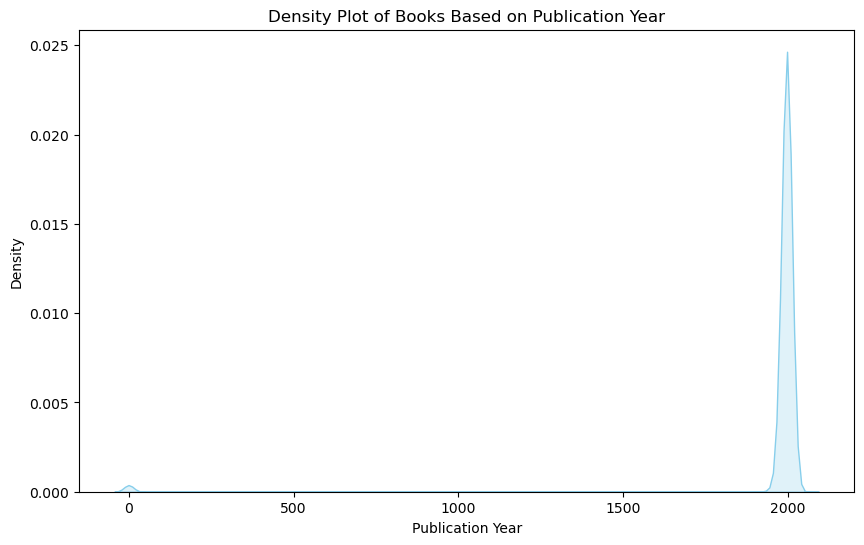

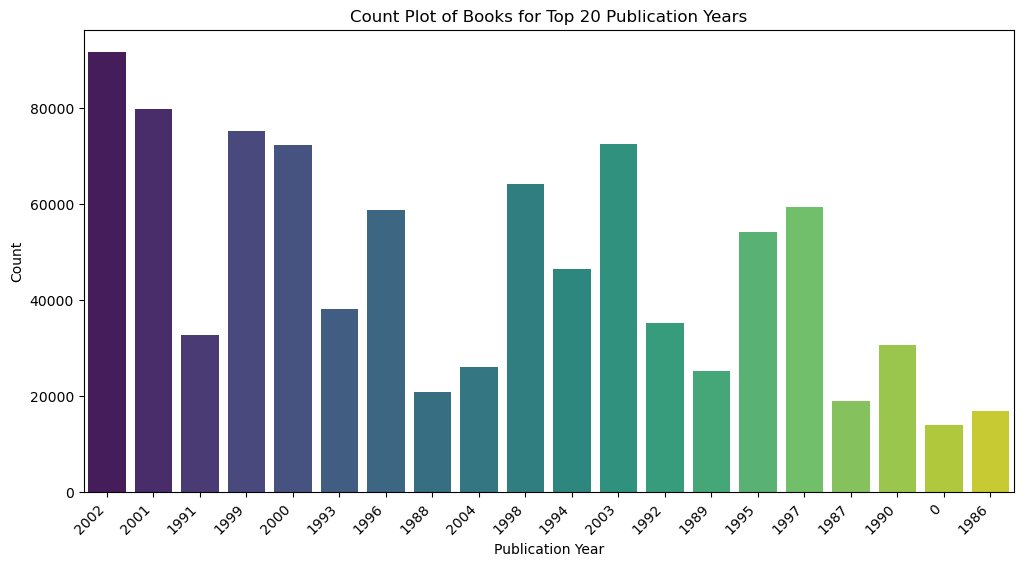

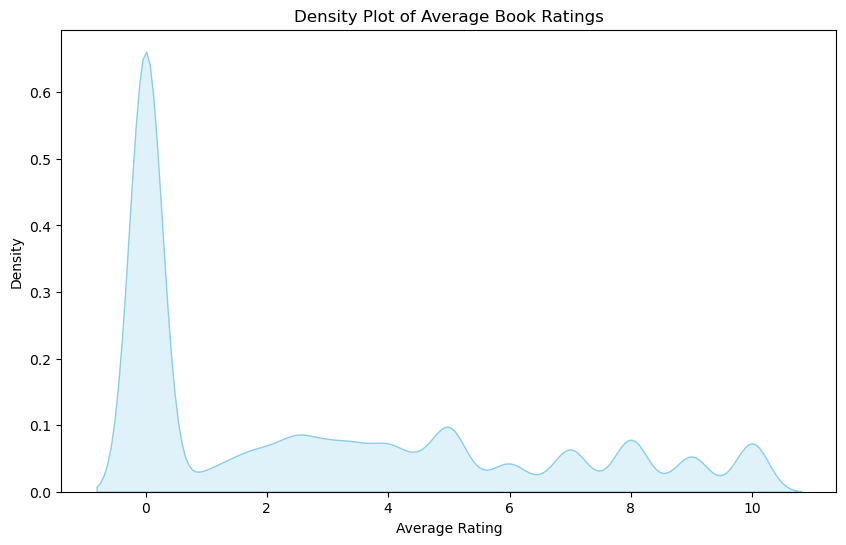

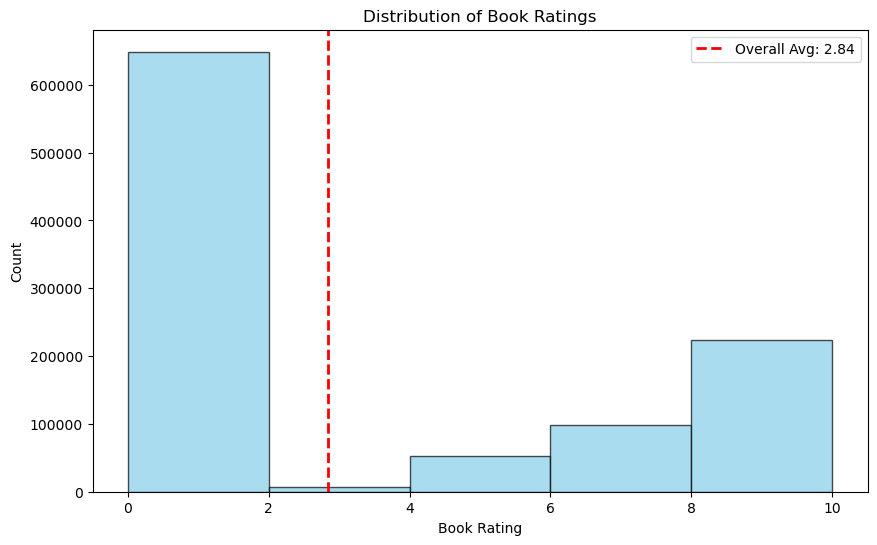

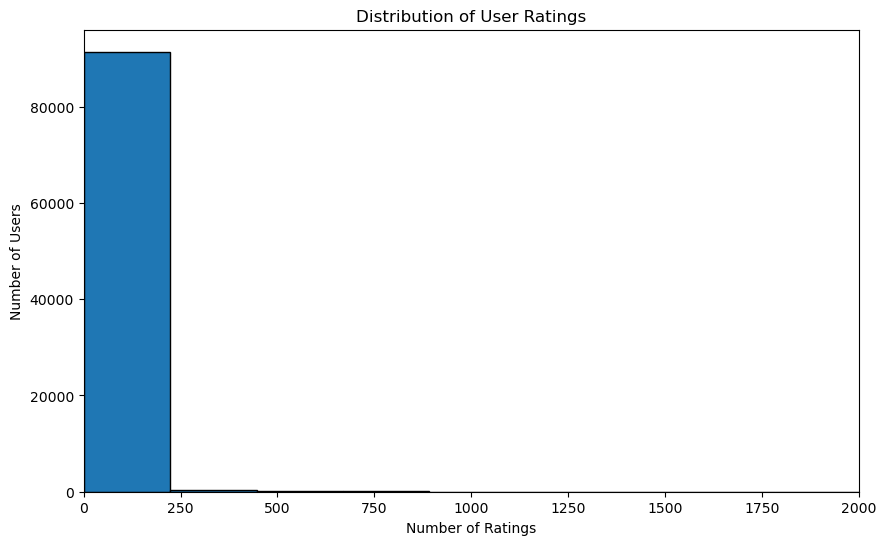

<Axes: >

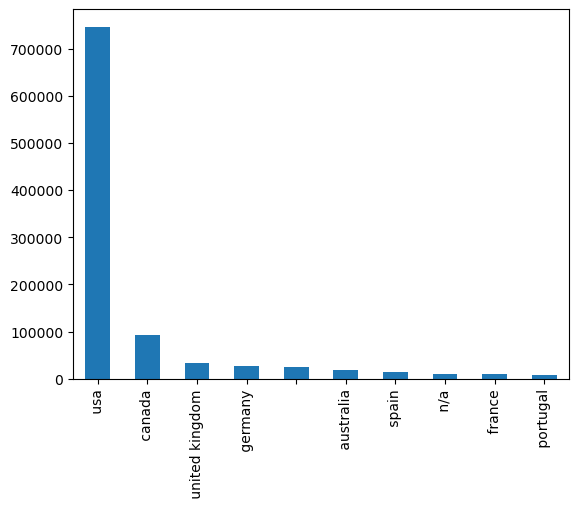

In [10]:
#Visualizations, check for any outliers!

#Publication Year
valid_years = merged_data['Year-Of-Publication'].astype(str).str.isnumeric()
filtered_data = merged_data[valid_years]
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data['Year-Of-Publication'].astype(int), color='skyblue', fill=True)
plt.title('Density Plot of Books Based on Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Density')
plt.show()

#Count Plot of Books for Top 20 Publication Years
valid_years = merged_data['Year-Of-Publication'].astype(str).str.isnumeric()
filtered_data = merged_data[valid_years]
top_years = filtered_data['Year-Of-Publication'].value_counts().nlargest(20).index
filtered_data_top_years = filtered_data[filtered_data['Year-Of-Publication'].isin(top_years)]
plt.figure(figsize=(12, 6))
sns.countplot(x='Year-Of-Publication', data=filtered_data_top_years, palette='viridis')
plt.title('Count Plot of Books for Top 20 Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Density plot of Average book rating
average_ratings = merged_data.groupby('ISBN')['Book-Rating'].mean()
plt.figure(figsize=(10, 6))
sns.kdeplot(average_ratings, color='skyblue', fill=True)
plt.title('Density Plot of Average Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.show()

#Distribution of Book Ratings
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Book-Rating'], bins=5, edgecolor='black', color='skyblue', alpha=0.7)
overall_average_rating = merged_data['Book-Rating'].mean()
plt.axvline(x=overall_average_rating, color='red', linestyle='dashed', linewidth=2, label=f'Overall Avg: {overall_average_rating:.2f}')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.legend()
plt.show()

#Distribution of User rating counts
user_ratings_count = merged_data['User-ID'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=50, edgecolor='black')
plt.title('Distribution of User Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.xlim(0, 2000)
plt.show()

#most popular locations
merged_data['Location'] = merged_data['Location'].apply(lambda x:x.split(',')[-1])
merged_data['Location'].value_counts().head(10).plot(kind='bar')

In [11]:
#user who has rated at least x books
#books that have received at least x ratings ( x average ratings ?) Book ratings>=50
#removes outliers
merged_data = merged_data.groupby('ISBN').filter(lambda x: x['Book-Rating'].count() >= 50)
merged_data = merged_data.groupby('User-ID').filter(lambda x: x['Book-Rating'].count() >= 50)

# Display the merged_data after applying the threshold
print("Merged data after applying thresholds:")
display(merged_data.head())

print(merged_data.shape)


Merged data after applying thresholds:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Books-Data,User-ID,Book-Rating,Location
84,0440234743,The Testament,John Grisham,1999,Dell,0440234743The TestamentJohn Grisham1999Dellhtt...,11676,9,n/a
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,0452264464Beloved (Plume Contemporary Fiction)...,11676,8,n/a
88,0971880107,Wild Animus,Rich Shapero,2004,Too Far,0971880107Wild AnimusRich Shapero2004Too Farht...,11676,6,n/a
89,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,0345402871AirframeMichael Crichton1997Ballanti...,11676,0,n/a
90,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,0345417623TimelineMICHAEL CRICHTON2000Ballanti...,11676,10,n/a


(95690, 9)


# KNN

In [12]:
book_user_mat = merged_data.pivot(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)
book_user_mat_sparse = csr_matrix(book_user_mat.values)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(book_user_mat_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [13]:
target_book_isbn = '0452264464'  # Replace with the actual ISBN
target_book_index = book_user_mat.index.get_loc(target_book_isbn)
distances, indices = model_knn.kneighbors([book_user_mat.iloc[target_book_index].values], n_neighbors=5)

print("Nearest Neighbors for Book with ISBN:", target_book_isbn)
for i, (distance, index) in enumerate(zip(distances.flatten(), indices.flatten())):
    neighbor_book_isbn = book_user_mat.index[index]
    print(f"{i + 1}. ISBN: {neighbor_book_isbn}, Distance: {distance}")



Nearest Neighbors for Book with ISBN: 0452264464
1. ISBN: 0452264464, Distance: 2.220446049250313e-16
2. ISBN: 0786866276, Distance: 0.6812116434683309
3. ISBN: 0061099694, Distance: 0.7280975223856371
4. ISBN: 0345389964, Distance: 0.7362757756727089
5. ISBN: 3442541751, Distance: 0.7449693147746648


#Collaborative Filtering



In [14]:
# Calculating global

global_mean = merged_data['Book-Rating'].mean()

# Test
print("Global Mean:", global_mean)


Global Mean: 1.9674156129167102


In [15]:
user_means = merged_data.groupby('User-ID')['Book-Rating'].mean()

# Test
user_id = 11676  # Replace with the desired user ID
user_mean = user_means.get(user_id, global_mean)  # Use global mean if user ID is not found
print(f"User {user_id} Mean Rating:", user_mean)


User 11676 Mean Rating: 4.940537084398977


In [16]:
item_means = merged_data.groupby('ISBN')['Book-Rating'].mean()

# Test
isbn = '0440234743'  # Replace with the desired ISBN
item_mean = item_means.get(isbn, global_mean)  # Use global mean if ISBN is not found
print(f"Item {isbn} Mean Rating:", item_mean)


Item 0440234743 Mean Rating: 1.6133333333333333


In [17]:
trainset, testset = train_test_split(merged_data, test_size=0.2, random_state=42)
# Create user-item matrices training and testing sets
trainset_matrix = trainset.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating', fill_value=0)
testset_matrix = testset.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating', fill_value=0)


In [18]:
class CollaborativeFilteringRecommendationSystem:
    def __init__(self, user_Item, global_mean, user_means, item_means):
        self.user_Item = user_Item
        self.global_mean = global_mean
        self.user_means = user_means
        self.item_means = item_means
        self.userPearsonSim = 1 - pairwise_distances(user_Item, metric='correlation')
        self.itemPearsonSim = 1 - pairwise_distances(user_Item.T, metric='correlation')

    def userBased_predict(self, user_id, item_id):
        user_ratings = self.user_Item.loc[user_id]
        ratingsSimValue = pd.Series(self.itemPearsonSim[self.user_Item.columns.get_loc(item_id)], index=self.user_Item.columns)
        filter_ratingsSimValue = np.multiply(ratingsSimValue, user_ratings)
        user_mean = self.user_means.get(user_id, self.global_mean)
        itemUserRating_prediction = (filter_ratingsSimValue.sum() + user_mean) / (ratingsSimValue.abs().sum() + 1)
        return itemUserRating_prediction

    def itemBased_predict(self, user_id, item_id):
        user_ratings = self.user_Item.loc[user_id]
        ratingsSimValue = pd.Series(self.userPearsonSim[user_id - 1], index=self.user_Item.index)
        filter_ratingsSimValue = np.multiply(ratingsSimValue, user_ratings)
        item_mean = self.item_means.get(item_id, self.global_mean)
        itemUserRating_prediction = (filter_ratingsSimValue.sum() + item_mean) / (ratingsSimValue.abs().sum() + 1)
        return itemUserRating_prediction

    def bookUser_Recommender(self, user_id, top_n=10):
        itemRatings_prediction = {}
        for item_id in self.user_Item.columns:
            itemUserRating_prediction = self.userBased_predict(user_id, item_id)
            itemRatings_prediction[item_id] = itemUserRating_prediction
        bestBook_recommendations = sorted(itemRatings_prediction.items(), key=lambda x: x[1], reverse=True)[:top_n]
        return bestBook_recommendations

    def evaluate_recommendations(self, user_id, testset_matrix, threshold=0.1):
        # Generate recommendations for the user
        recommended_books = self.bookUser_Recommender(user_id)
        recommended_isbns, predicted_ratings = zip(*recommended_books)

        # Extract actual ratings for recommended books
        actual_ratings = testset_matrix.loc[user_id, testset_matrix.columns.isin(recommended_isbns)]

        # Calculate RMSE
        rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)

        # Calculate Precision, Recall, and F1-score
        actual_labels = [1 if rating > 0 else 0 for rating in actual_ratings]
        predicted_labels = [1 if rating >= threshold else 0 for rating in predicted_ratings]

        precision = precision_score(actual_labels, predicted_labels)
        recall = recall_score(actual_labels, predicted_labels)
        f1 = f1_score(actual_labels, predicted_labels)

        return rmse, precision, recall, f1

user_item_matrix_sparse = csr_matrix(trainset_matrix.values)

# Calculate global mean, user means, and item means
global_mean = trainset_matrix.values.mean()
user_means = trainset_matrix.mean(axis=1)
item_means = trainset_matrix.mean(axis=0)

# Start the recommendation system with the training data and additional parameters
recSystrain = CollaborativeFilteringRecommendationSystem(testset_matrix, global_mean, user_means, item_means)

# Get recommendations for a user
user_id = 177458
bestBook_recommendations = recSystrain.bookUser_Recommender(user_id)

# Extract only ISBNs from the list of tuples
isbn_Recommend = list(map(lambda x: x[0], bestBook_recommendations))

# Extract book details for the best recommendations using ISBNs
book_info = books_data.set_index('ISBN')
recommended_books_info = book_info.loc[isbn_Recommend]

# Display the best recommendations for the user
display(recommended_books_info[['Book-Title', 'Year-Of-Publication']])

,Book-Title,Year-Of-Publication
ISBN,,
0553297260,Darkness,1992
0679444815,Timeline,1999
0515113328,The Cat Who Went into the Closet,1995
0345353145,Sphere,1988
0767903579,Falling Leaves: The True Story of an Unwanted ...,1999
0425192733,Portrait of a Killer: Jack the Ripper-- Case C...,2003
0679736042,Toujours Provence (Vintage Departures),1992
0451167716,The Godfather,2004
1551668459,Cabin,2002


In [19]:
# Evaluate recommendations
rmse, precision, recall, f1 = recSystrain.evaluate_recommendations(user_id, testset_matrix)

print("Evaluation Metrics for Collaborative Filtering:")
print(f"RMSE: {rmse}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Evaluation Metrics for Collaborative Filtering:
RMSE: 3.5092542646125384
Precision: 0.3
Recall: 1.0
F1-score: 0.4615384615384615


# Content-Based Filtering

In [20]:
# Remove duplicate entries based on 'Book-Title' and keep the first occurrence
merged_data.drop_duplicates(subset='Book-Title', keep='first', inplace=True)

# Class for Content-Based Filtering
class ContentBasedFiltering:
    def __init__(self, trainset, testset):
        self.trainset = trainset  # Training set
        self.testset = testset    # Test set
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # TF-IDF vectorizer
        self.tfidf_matrix = self._create_tfidf_matrix()  # Create TF-IDF matrix

    # Method to create TF-IDF matrix
    def _create_tfidf_matrix(self):
        # Combine 'Book-Title' and 'Book-Author' as text data
        book_text_data = self.trainset['Book-Title'].astype(str) + ' ' + self.trainset['Book-Author'].astype(str)
        # Generate TF-IDF matrix
        tfidf_matrix = self.tfidf_vectorizer.fit_transform(book_text_data)
        return tfidf_matrix

    # Method to recommend similar books
    def recommend_similar_books(self, book_title, top_n=10):
        book_indices = self.trainset[self.trainset['Book-Title'] == book_title].index  # Find index of the book title
        if len(book_indices) == 0:
            print(f"Book '{book_title}' not found in the training set.")
            return []  # Return empty list if book not found
        else:
            book_index = book_indices[0]
            similarity_scores = cosine_similarity(self.tfidf_matrix[book_index], self.tfidf_matrix)  # Calculate cosine similarity
            similar_books_indices = similarity_scores.argsort(axis=1)[0][-top_n:][::-1]  # Find top similar books
            similar_books_info = self.trainset.iloc[similar_books_indices][["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication"]]  # Retrieve book info
            return similar_books_info

    # Method to evaluate the content-based system
    def evaluate(self, testset):
        # Get indices of test set
        test_book_indices = testset.index

        # Create TF-IDF matrix for test set
        test_book_text_data = testset['Book-Title'].astype(str) + ' ' + testset['Book-Author'].astype(str)
        test_tfidf_matrix = self.tfidf_vectorizer.transform(test_book_text_data)

        # Calculate similarities between test set and training set
        similarities = cosine_similarity(test_tfidf_matrix, self.tfidf_matrix)

        # Initialize evaluation metrics
        top_n = 10
        rmses = []
        precisions = []
        recalls = []
        f1_scores = []

        # Evaluate recommendations for each test item
        for i, index in enumerate(test_book_indices):
            similarity_scores = similarities[i]

            top_similar_indices = similarity_scores.argsort()[-top_n:][::-1]

            # Handle empty recommendations
            if len(top_similar_indices) == 0:
                continue

            true_ratings = testset.loc[index]['Book-Rating']  # Get true ratings from test set
            predicted_ratings = self.trainset.iloc[top_similar_indices]['Book-Rating'].mean()  # Predicted ratings from similar items

            # Calculate RMSE
            rmse = mean_squared_error([true_ratings], [predicted_ratings], squared=False)
            rmses.append(rmse)

            # Calculate precision, recall, and F1-score
            intersection = len(set(top_similar_indices).intersection(set(self.trainset.index)))
            precision = intersection / top_n
            recall = intersection / len(self.trainset)
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

        # Calculate average evaluation metrics
        if len(rmses) == 0:
            avg_rmse = 0
        else:
            avg_rmse = sum(rmses) / len(rmses)

        if len(precisions) == 0 or len(recalls) == 0:
            avg_precision = 0
            avg_recall = 0
            avg_f1_score = 0
        else:
            avg_precision = sum(precisions) / len(precisions)
            avg_recall = sum(recalls) / len(recalls)
            avg_f1_score = sum(f1_scores) / len(f1_scores)

        return avg_rmse, avg_precision, avg_recall, avg_f1_score

# Perform train-test split on merged_data
trainset, testset = train_test_split(merged_data, test_size=0.2, random_state=42)

# Initialize content-based system with train and test sets
content_based_system = ContentBasedFiltering(trainset, testset)

# Get content-based recommendations for a specific book title
book_title = "Wild Justice"
bestBook_recommendations = content_based_system.recommend_similar_books(book_title)

# Extract only ISBNs from the list of recommendations
isbn_Recommend = bestBook_recommendations['ISBN'].tolist()

# Extract book details for the recommended ISBNs from books_data
book_info = books_data.set_index('ISBN')
recommended_books_info = book_info.loc[isbn_Recommend]

# Display the recommended book details
display(recommended_books_info[['Book-Title', 'Year-Of-Publication']])


,Book-Title,Year-Of-Publication
ISBN,,
0786868619,Stolen Lives: Twenty Years in a Desert Jail,2001
0345397819,Lasher: Lives of the Mayfair Witches (Lives of...,1995
0061091790,After All These Years,1994
0804113475,Ladder of Years,1997
0345404319,Taltos: Lives of the Mayfair Witches,1996
0345384466,The Witching Hour (Lives of the Mayfair Witches),1993
0060976497,Ten Stupid Things Women Do to Mess Up Their Lives,1995
0140265686,Out to Canaan (The Mitford Years),1998
0140254544,A Light in the Window (The Mitford Years),1996


In [21]:

# Evaluate recommendations
avg_rmse, avg_precision, avg_recall, avg_f1_score = content_based_system.evaluate(testset)
print("RMSE:", avg_rmse)
print("Precision:", avg_precision)
print("Recall:", avg_recall)
print("F1-score:", avg_f1_score)


RMSE: 3.7949109414758295
Precision: 0.40381679389312936
Recall: 0.002570444264119227
F1-score: 0.005108371839255281


# Hybrid Model


In [22]:
class HybridRecommender:
    def __init__(self, collaborative_filter, content_filter, popular_items, collab_weight=8.5, content_weight=8.5):
        self.collaborative_filter = collaborative_filter
        self.content_filter = content_filter
        self.popular_items = popular_items  # List of popular items as a fallback
        self.collab_weight = collab_weight  # Weight for collaborative filtering scores
        self.content_weight = content_weight  # Weight for content-based filtering scores

    def hybrid_recommendations(self, user_id, book_title, testset_matrix, top_n=10):
        # Generate collaborative filtering recommendations
        collab_recs = self.collaborative_filter.bookUser_Recommender(user_id)

        # Generate content-based recommendations
        content_recs = self.content_filter.recommend_similar_books(book_title)

        # Normalize scores from collaborative filtering recommendations
        collab_scores = {isbn: rating for isbn, rating in collab_recs}
        max_collab_score = max(collab_scores.values())
        normalized_collab_scores = {isbn: score / max_collab_score for isbn, score in collab_scores.items()}

        # Normalize scores from content-based recommendations
        content_scores = {isbn: 1 / (index + 1) for index, isbn in enumerate(content_recs['ISBN'])}
        max_content_score = max(content_scores.values())
        normalized_content_scores = {isbn: score / max_content_score for isbn, score in content_scores.items()}

        # Combine normalized scores with weighted average
        combined_scores = {}
        for isbn in set(normalized_collab_scores) | set(normalized_content_scores):
            collab_score = normalized_collab_scores.get(isbn, 0) * self.collab_weight
            content_score = normalized_content_scores.get(isbn, 0) * self.content_weight
            combined_scores[isbn] = collab_score + content_score

        # Sort the combined recommendations by score
        sorted_combined_recs = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:int(top_n)]

        # Extract ISBNs from the combined recommendations
        isbn_recommendations = [isbn for isbn, _ in sorted_combined_recs]

        # Fallback for new users or items - Recommend popular items if no recommendations
        if not isbn_recommendations:
            isbn_recommendations = self.popular_items

        # Extract book details for the recommended ISBNs from books_data
        book_info = books_data.set_index('ISBN')
        recommended_books_info = book_info.loc[isbn_recommendations]

        # Evaluate performance using testset_matrix
        user_test_ratings = testset_matrix.loc[user_id]
        print("User Test Ratings:")
        print(user_test_ratings)

        # Check if testset_matrix only contains zeros
        print("Testset Matrix contains only zeros:", user_test_ratings.eq(0).all().all())

        # Print non-zero entries in user_test_ratings
        non_zero_ratings = user_test_ratings[user_test_ratings != 0]
        print("Non-Zero Ratings:")
        print(non_zero_ratings)

        actual_ratings = user_test_ratings[user_test_ratings.index.isin(isbn_recommendations)]
        print("Filtered Actual Ratings:")
        print(actual_ratings)

        predicted_ratings = [combined_scores.get(isbn, 0) for isbn in isbn_recommendations]

        # Calculate RMSE on test set
        rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)

        # Calculate Precision, Recall, and F1-score
        threshold = 0.1 
        predicted_labels = [1 if rating >= threshold else 0 for rating in predicted_ratings]
        actual_labels = [1 if rating > 0 else 0 for rating in actual_ratings]

        precision = precision_score(actual_labels, predicted_labels)
        recall = recall_score(actual_labels, predicted_labels)
        f1 = f1_score(actual_labels, predicted_labels)

        print("Actual Ratings:", actual_ratings)
        print("Predicted Ratings:", predicted_ratings)
        print("Predicted Labels:", predicted_labels)

        predicted_ratings_train = [combined_scores.get(isbn, 0) for isbn in trainset_matrix.columns]
        actual_ratings_train = trainset_matrix.loc[user_id]
        rmse_train = mean_squared_error(actual_ratings_train, predicted_ratings_train, squared=False)

        # Calculate Precision, Recall, and F1-score for the training set
        predicted_labels_train = [1 if rating >= threshold else 0 for rating in predicted_ratings_train]
        actual_labels_train = [1 if rating > 0 else 0 for rating in actual_ratings_train]

        precision_train = precision_score(actual_labels_train, predicted_labels_train)
        recall_train = recall_score(actual_labels_train, predicted_labels_train)
        f1_train = f1_score(actual_labels_train, predicted_labels_train)

        print("\nTraining Set Metrics:")
        print("RMSE:", rmse_train)
        print("Precision:", precision_train)
        print("Recall:", recall_train)
        print("F1-score:", f1_train)

        return recommended_books_info[['Book-Title', 'Year-Of-Publication']], rmse, precision, recall, f1,rmse_train,precision_train,recall_train,f1_train

collaborative_filter = CollaborativeFilteringRecommendationSystem(trainset_matrix, global_mean, user_means, item_means)

content_filter = ContentBasedFiltering(trainset, testset)

# List of popular items as a fallback (Books with ratings of 10)
popular_items = [
    '3596151465',
    '055310666X',
    '60096195',
    '142302198',
    '038076041X',
    '699854289',
    '786817070',
    '805057706',
    '1573248533',
    '3423071516'
]

# Initialize the hybrid recommender system with both filters and popular items
hybrid_recommender = HybridRecommender(collaborative_filter, content_filter, popular_items)

# Get hybrid recommendations for a specific user and book title
user_id = 177458
book_title = "Wild Justice"
# recommended_books, rmse, precision, recall, f1 = hybrid_recommender.hybrid_recommendations(user_id, book_title, testset_matrix)
recommended_books, rmse, precision, recall, f1,rmse_train,precision_train,recall_train,f1_train = hybrid_recommender.hybrid_recommendations(user_id, book_title, trainset_matrix)

# Display the hybrid recommendations and performance metrics
#test set
print("Recommended Books:")
display(recommended_books)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#overfitting
print("\nTraining Set Metrics:")
print("RMSE:", rmse_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

User Test Ratings:
ISBN
000649840X    0
0007110928    0
002026478X    0
0020442203    0
002542730X    0
             ..
1931561648    0
3257228007    0
3257229534    0
3423202327    0
3492045170    0
Name: 177458, Length: 2159, dtype: int64
Testset Matrix contains only zeros: False
Non-Zero Ratings:
ISBN
0061009059    8
0064400557    8
0312306326    8
0312971346    8
0312976275    8
0312983271    7
0345354621    7
0345370775    8
0345378482    6
0375703764    8
0441003745    6
0441304834    7
0441478123    7
0446606812    5
0446610038    7
0451151259    8
0451177096    7
0451180232    7
0553573403    8
0553580221    8
0609610597    7
0671027573    7
0679751521    7
0842329129    5
0842342702    4
0886777844    8
Name: 177458, dtype: int64
Filtered Actual Ratings:
ISBN
0312306326    8
0345397819    0
0375703764    8
0441003745    6
0441304834    7
0441478123    7
0451151259    8
0451180232    7
0786868619    0
0886777844    8
Name: 177458, dtype: int64
Actual Ratings: ISBN
0312306326   

,Book-Title,Year-Of-Publication
ISBN,,
0441478123,The Left Hand of Darkness (Remembering Tomorrow),1991
0786868619,Stolen Lives: Twenty Years in a Desert Jail,2001
0886777844,Summon the Keeper,1998
0345397819,Lasher: Lives of the Mayfair Witches (Lives of...,1995
0441003745,Bloody Bones (Anita Blake Vampire Hunter (Pape...,2001
0451151259,Eyes of the Dragon,1988
0375703764,House of Leaves,2000
0441304834,Guilty Pleasures (Anita Blake Vampire Hunter (...,1995
0451180232,Nightmares &amp; Dreamscapes,2004


RMSE: 4.179186669497977
Precision: 0.8
Recall: 1.0
F1-score: 0.888888888888889

Training Set Metrics:
RMSE: 0.6960704662672718
Precision: 0.5
Recall: 0.38461538461538464
F1-score: 0.4347826086956522
